/var/folders/5f/mq9vqp1n0l17my7qjwhg9h7h0000gn/T/ipykernel_4997/1626886306.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "order_date": pd.date_range(start="2023-01-01", periods=rows, freq="H"),
/var/folders/5f/mq9vqp1n0l17my7qjwhg9h7h0000gn/T/ipykernel_4997/1626886306.py:46: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


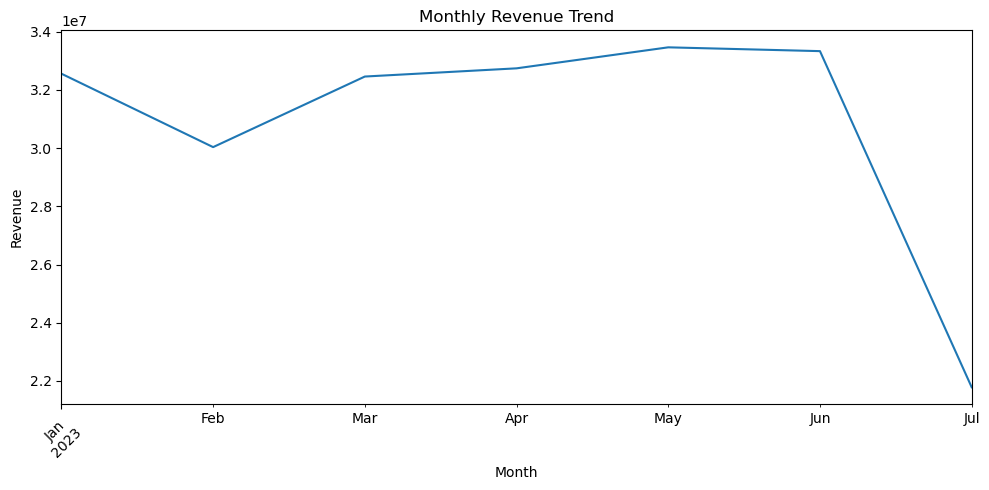

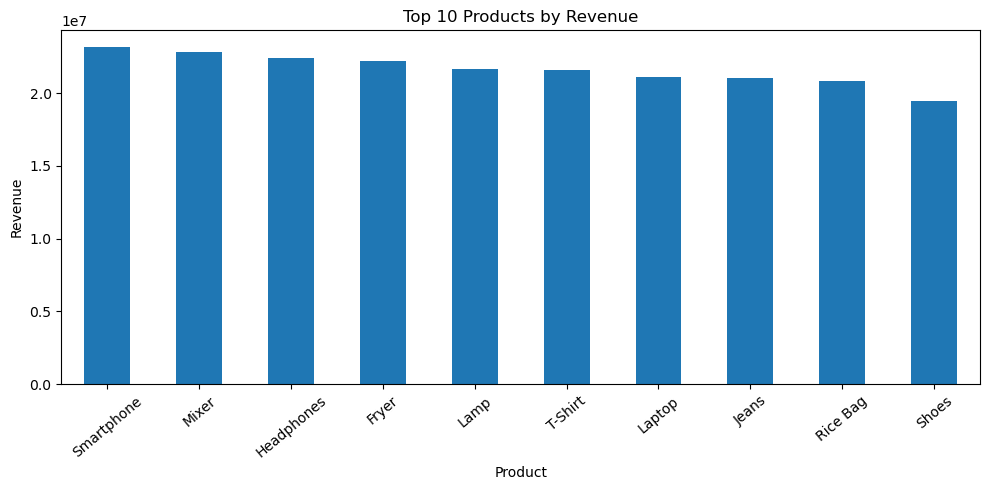

Analysis complete.
Files generated: clean_sales_data.csv, monthly_revenue.csv, top_products.csv


In [1]:
# ----------------------------------------
# Sales Data Analysis Project
# End-to-end workflow
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# Load or Generate Sample Data (if no CSV available)
# ------------------------------------------------------------------

# If you already have a CSV, uncomment this:
# df = pd.read_csv("sales_data.csv")

# Creating a synthetic dataset for analysis (realistic structure)
np.random.seed(1)
rows = 4800

df = pd.DataFrame({
    "order_id": np.arange(1, rows + 1),
    "order_date": pd.date_range(start="2023-01-01", periods=rows, freq="H"),
    "customer_id": np.random.randint(1001, 1600, rows),
    "region": np.random.choice(["North", "South", "East", "West"], rows),
    "category": np.random.choice(["Electronics", "Fashion", "Grocery", "Home Decor"], rows),
    "product": np.random.choice([
        "Smartphone", "Laptop", "Headphones", "Shoes", "T-Shirt",
        "Fryer", "Lamp", "Rice Bag", "Mixer", "Jeans"
    ], rows),
    "quantity": np.random.randint(1, 4, rows),
    "price": np.random.randint(150, 45000, rows)
})

# ------------------------------------------------------------------
# Basic Cleaning
# ------------------------------------------------------------------

# Convert date column
df["order_date"] = pd.to_datetime(df["order_date"])

# Remove duplicate rows
df = df.drop_duplicates()

# Fill missing values if any
df = df.fillna(method="ffill")

# Create revenue column
df["revenue"] = df["quantity"] * df["price"]

# ------------------------------------------------------------------
# Exploratory Analysis
# ------------------------------------------------------------------

# General summary
summary = df.describe()

# Total revenue
total_revenue = df["revenue"].sum()

# Revenue by region
region_revenue = df.groupby("region")["revenue"].sum().sort_values(ascending=False)

# Revenue by category
category_revenue = df.groupby("category")["revenue"].sum().sort_values(ascending=False)

# Monthly trend
df["month"] = df["order_date"].dt.to_period("M")
monthly_revenue = df.groupby("month")["revenue"].sum()

# Top products
top_products = (
    df.groupby("product")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# ------------------------------------------------------------------
# Visualizations
# ------------------------------------------------------------------

# Monthly revenue trend
plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind="line")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top product revenue
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# Customer Analysis
# ------------------------------------------------------------------

order_counts = df.groupby("customer_id")["order_id"].nunique()

repeat_customers = order_counts[order_counts > 1].count()
new_customers = order_counts[order_counts == 1].count()

# ------------------------------------------------------------------
# Export cleaned data for GitHub / PowerBI
# ------------------------------------------------------------------

df.to_csv("clean_sales_data.csv", index=False)
monthly_revenue.to_csv("monthly_revenue.csv")
top_products.to_csv("top_products.csv")

print("Analysis complete.")
print("Files generated: clean_sales_data.csv, monthly_revenue.csv, top_products.csv")